In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import yfinance as yf

In [2]:
NUM_TRADING_DAYS = 252

num_SIMULATIONS = 10000

stocks = ["RELIANCE.NS", "TCS.NS", "HINDUNILVR.NS", "HDFCBANK.NS", "ITC.NS", "LT.NS", "INFY.NS"]

start_date = "2018-10-01"
end_date = "2023-10-01"

In [3]:
stock_data = {}

for stock in stocks:
  ticker = yf.Ticker(stock)
  stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']
stock_prices = pd.DataFrame(stock_data)


In [4]:
stock_prices

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,1197.153320,2024.674072,1513.858521,982.032593,246.232285,1140.846191,645.737305
2018-10-03 00:00:00+05:30,1171.299316,1941.462891,1492.242554,979.958130,244.657578,1138.423706,630.040222
2018-10-04 00:00:00+05:30,1090.773071,1853.448853,1450.854004,944.545166,237.944412,1149.804077,611.618896
2018-10-05 00:00:00+05:30,1019.431824,1887.424561,1436.658569,948.187744,229.159256,1121.924927,626.667297
2018-10-08 00:00:00+05:30,1078.283569,1864.894165,1437.395996,938.393738,226.424286,1110.910522,617.889160
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,2340.449951,3577.149902,2475.850098,1531.000000,442.600006,2902.500000,1474.150024
2023-09-26 00:00:00+05:30,2342.500000,3585.699951,2478.949951,1537.650024,442.450012,2912.550049,1460.650024
2023-09-27 00:00:00+05:30,2368.899902,3589.300049,2501.750000,1526.849976,449.149994,2965.050049,1467.000000


In [5]:
log_returns = np.log(stock_prices / stock_prices.shift(1))

In [6]:
log_returns

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-03 00:00:00+05:30,-0.021833,-0.041967,-0.014382,-0.002115,-0.006416,-0.002126,-0.024609
2018-10-04 00:00:00+05:30,-0.071227,-0.046394,-0.028128,-0.036806,-0.027823,0.009947,-0.029674
2018-10-05 00:00:00+05:30,-0.067641,0.018165,-0.009832,0.003849,-0.037620,-0.024546,0.024306
2018-10-08 00:00:00+05:30,0.056125,-0.012009,0.000513,-0.010383,-0.012007,-0.009866,-0.014107
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,-0.006176,-0.007381,-0.002662,0.000882,-0.001129,-0.005497,-0.014814
2023-09-26 00:00:00+05:30,0.000876,0.002387,0.001251,0.004334,-0.000339,0.003457,-0.009200
2023-09-27 00:00:00+05:30,0.011207,0.001004,0.009155,-0.007049,0.015029,0.017865,0.004338


In [7]:
log_returns = log_returns[1:]

In [8]:
print(log_returns.mean() * NUM_TRADING_DAYS)

RELIANCE.NS      0.137190
TCS.NS           0.113347
HINDUNILVR.NS    0.099529
HDFCBANK.NS      0.089981
ITC.NS           0.120480
LT.NS            0.198878
INFY.NS          0.163002
dtype: float64


In [9]:
print(log_returns.std() * np.sqrt(NUM_TRADING_DAYS))

RELIANCE.NS      0.313954
TCS.NS           0.253070
HINDUNILVR.NS    0.238601
HDFCBANK.NS      0.270058
ITC.NS           0.265032
LT.NS            0.283981
INFY.NS          0.292504
dtype: float64


In [10]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []

In [11]:
for _ in range(num_SIMULATIONS) :
  w = np.random.random(len(stocks))
  w /= np.sum(w)
  portfolio_weights.append(w)
  port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS
  portfolio_returns.append(port_return)
  port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))
  portfolio_risks.append(port_risk)

In [12]:
portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

In [13]:
portfolios = pd.DataFrame({"Return": portfolio_returns, "Risks": portfolio_risks, "Sharpe Ratio": portfolio_returns / portfolio_risks})

In [14]:
portfolios

,Return,Risks,Sharpe Ratio
0,0.129167,0.180603,0.715200
1,0.133794,0.189898,0.704558
2,0.126969,0.184722,0.687352
3,0.114352,0.178365,0.641112
4,0.145852,0.196286,0.743059
...,...,...,...
9995,0.136122,0.189483,0.718384
9996,0.141849,0.189781,0.747435
9997,0.132806,0.182481,0.727781
9998,0.139415,0.193845,0.719207


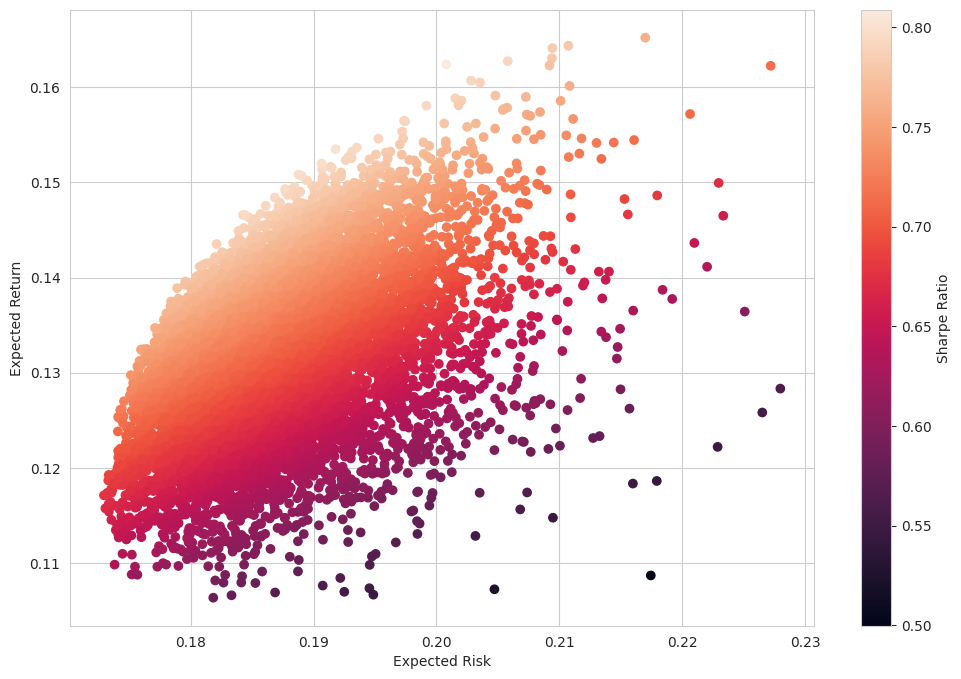

In [15]:
plt.figure(figsize = (12, 8))
plt.scatter(portfolio_risks, portfolio_returns, c = portfolio_returns / portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.show()

In [16]:
sharpe_ratios = portfolio_returns / portfolio_risks

ind =  0

for i in range(len(sharpe_ratios)):
  if sharpe_ratios[i] == np.amax(sharpe_ratios):
    ind = i

In [17]:
sharpe_ratios[ind]

0.8088611225358627

In [18]:
portfolio_returns[ind]

0.1624187805455288

In [19]:
portfolio_risks[ind]

0.2007993412222969

In [20]:
for i in range(len(stocks)):
  print(stocks[i], ':', portfolio_weights[ind][i])

RELIANCE.NS : 0.10538086946917753
TCS.NS : 0.03924610747094636
HINDUNILVR.NS : 0.038238719351706016
HDFCBANK.NS : 0.0023823771505273317
ITC.NS : 0.16669597436969502
LT.NS : 0.3839527658603871
INFY.NS : 0.2641031863275606


In [21]:
ind = 0

for i in range(len(portfolio_risks)):
  if portfolio_risks[i] == np.amin(portfolio_risks):
    ind = i

In [22]:
portfolio_returns[ind]

0.11710848854271419

In [23]:
portfolio_risks[ind]

0.17292748978235886

In [24]:
for i in range(len(stocks)):
  print(stocks[i], ':', portfolio_weights[ind][i])

RELIANCE.NS : 0.0329367701665677
TCS.NS : 0.2159305781396345
HINDUNILVR.NS : 0.2887968150061773
HDFCBANK.NS : 0.1225401266613223
ITC.NS : 0.2373548072616869
LT.NS : 0.08501362374569371
INFY.NS : 0.017427279018917635


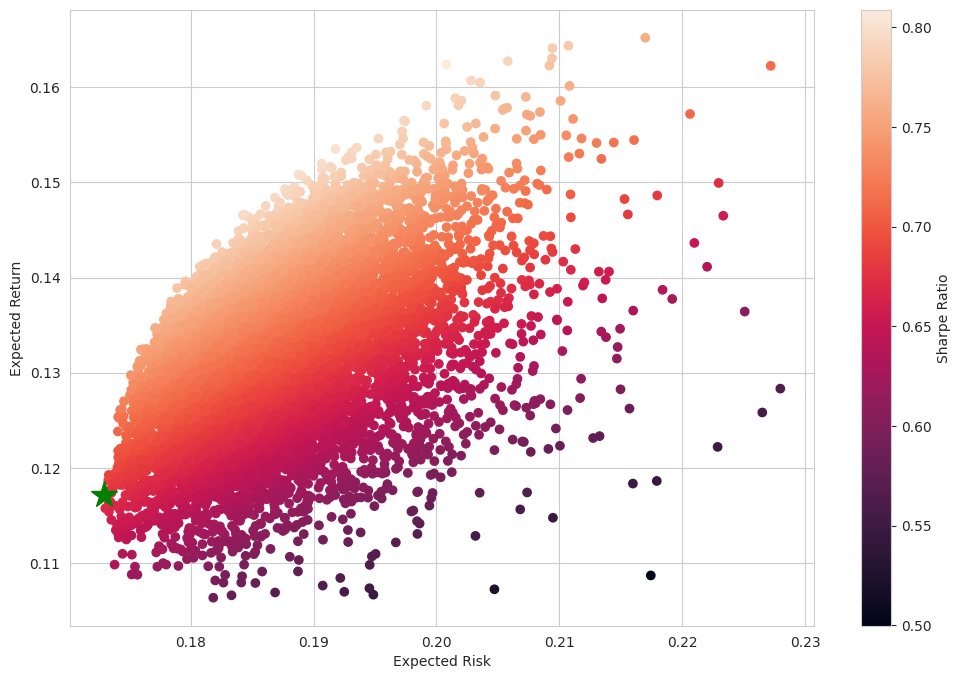

In [25]:
plt.figure(figsize = (12, 8))
plt.scatter(portfolio_risks, portfolio_returns, c = portfolio_returns / portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind], portfolio_returns[ind], 'g*', markersize = 20.0)

In [26]:
sharpe_ratios = portfolio_returns / portfolio_risks

ind =  0

for i in range(len(sharpe_ratios)):
  if sharpe_ratios[i] == np.amax(sharpe_ratios):
    ind = i

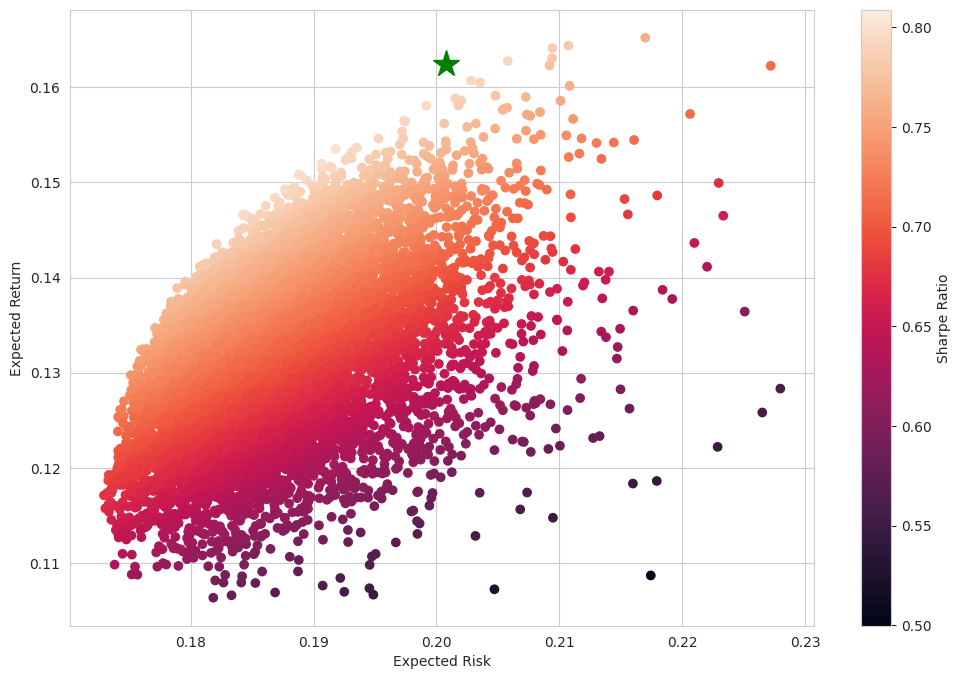

In [27]:
plt.figure(figsize = (12, 8))
plt.scatter(portfolio_risks, portfolio_returns, c = portfolio_returns / portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind], portfolio_returns[ind], 'g*', markersize = 20.0)